# 画图：不同模型不同切分

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
csv = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_ymx.csv')
# remove where 'model_name' is 'bert-large' or 'roberta-large'
csv = csv[~csv['model_name'].isin(['bert-large', 'roberta-large'])]
# # remove 'name=chatglm-20'
csv = csv[~csv['Name'].isin(['chatglm-20'])]
csv2 = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_cgz.csv')

# csv3 = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_qzh1.csv')
# combine the three csv
csv = pd.concat([csv, csv2])

In [29]:
csv

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,attacker_b2tr_enable,attacker_b2tr_sp,...,client0_DRA_b2tr_rgLf_sampled,client0_attacker_b2tr_step,client0_avg_loss,client0_global_round,client0_local_epoch,client0_local_step,client0_self,client0_step_loss,global_step,task_type
1,chatglm-21,finished,-,ymx10086,NaN,2024-03-23T09:37:42.000Z,174,NaN,True,21,...,0.711513,0.542857,3.222241,0.0,0.0,1199.0,0.0,2.826172,1199.0,NaN
2,chatglm-18,finished,-,ymx10086,NaN,2024-03-23T09:21:26.000Z,166,NaN,True,18,...,0.740364,0.584615,3.222241,0.0,0.0,1199.0,0.0,2.826172,1199.0,NaN
3,chatglm-16,finished,-,ymx10086,NaN,2024-03-23T09:08:26.000Z,416,NaN,True,16,...,0.776879,0.747692,3.222241,0.0,0.0,1199.0,0.0,2.826172,1199.0,NaN
4,chatglm-14,finished,-,ymx10086,NaN,2024-03-23T08:53:55.000Z,529,NaN,True,14,...,0.764985,0.654286,3.222241,0.0,0.0,1199.0,0.0,2.826172,1199.0,NaN
5,chatglm-12,finished,-,ymx10086,NaN,2024-03-23T08:46:07.000Z,150,NaN,True,12,...,0.791901,0.670769,3.222241,0.0,0.0,1199.0,0.0,2.826172,1199.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,bert-large-15,finished,-,stupidtree,NaN,2024-03-22T14:58:03.000Z,213,NaN,True,15,...,0.667247,0.668514,0.704396,0.0,0.0,1199.0,0.0,0.715367,1199.0,NaN
39,bert-large-12,finished,-,stupidtree,NaN,2024-03-22T14:49:05.000Z,256,NaN,True,12,...,0.668446,0.672278,0.704396,0.0,0.0,1199.0,0.0,0.715367,1199.0,NaN
40,bert-large-9,finished,-,stupidtree,NaN,2024-03-22T14:40:50.000Z,205,NaN,True,9,...,0.676221,0.672278,0.704396,0.0,0.0,1199.0,0.0,0.715367,1199.0,NaN
41,bert-large-6,finished,-,stupidtree,NaN,2024-03-22T14:32:45.000Z,211,NaN,True,6,...,0.676251,0.672278,0.704396,0.0,0.0,1199.0,0.0,0.715367,1199.0,NaN


/tmp/ipykernel_83609/383996743.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
/tmp/ipykernel_83609/383996743.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
/tmp/ipykernel_83609/383996743.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

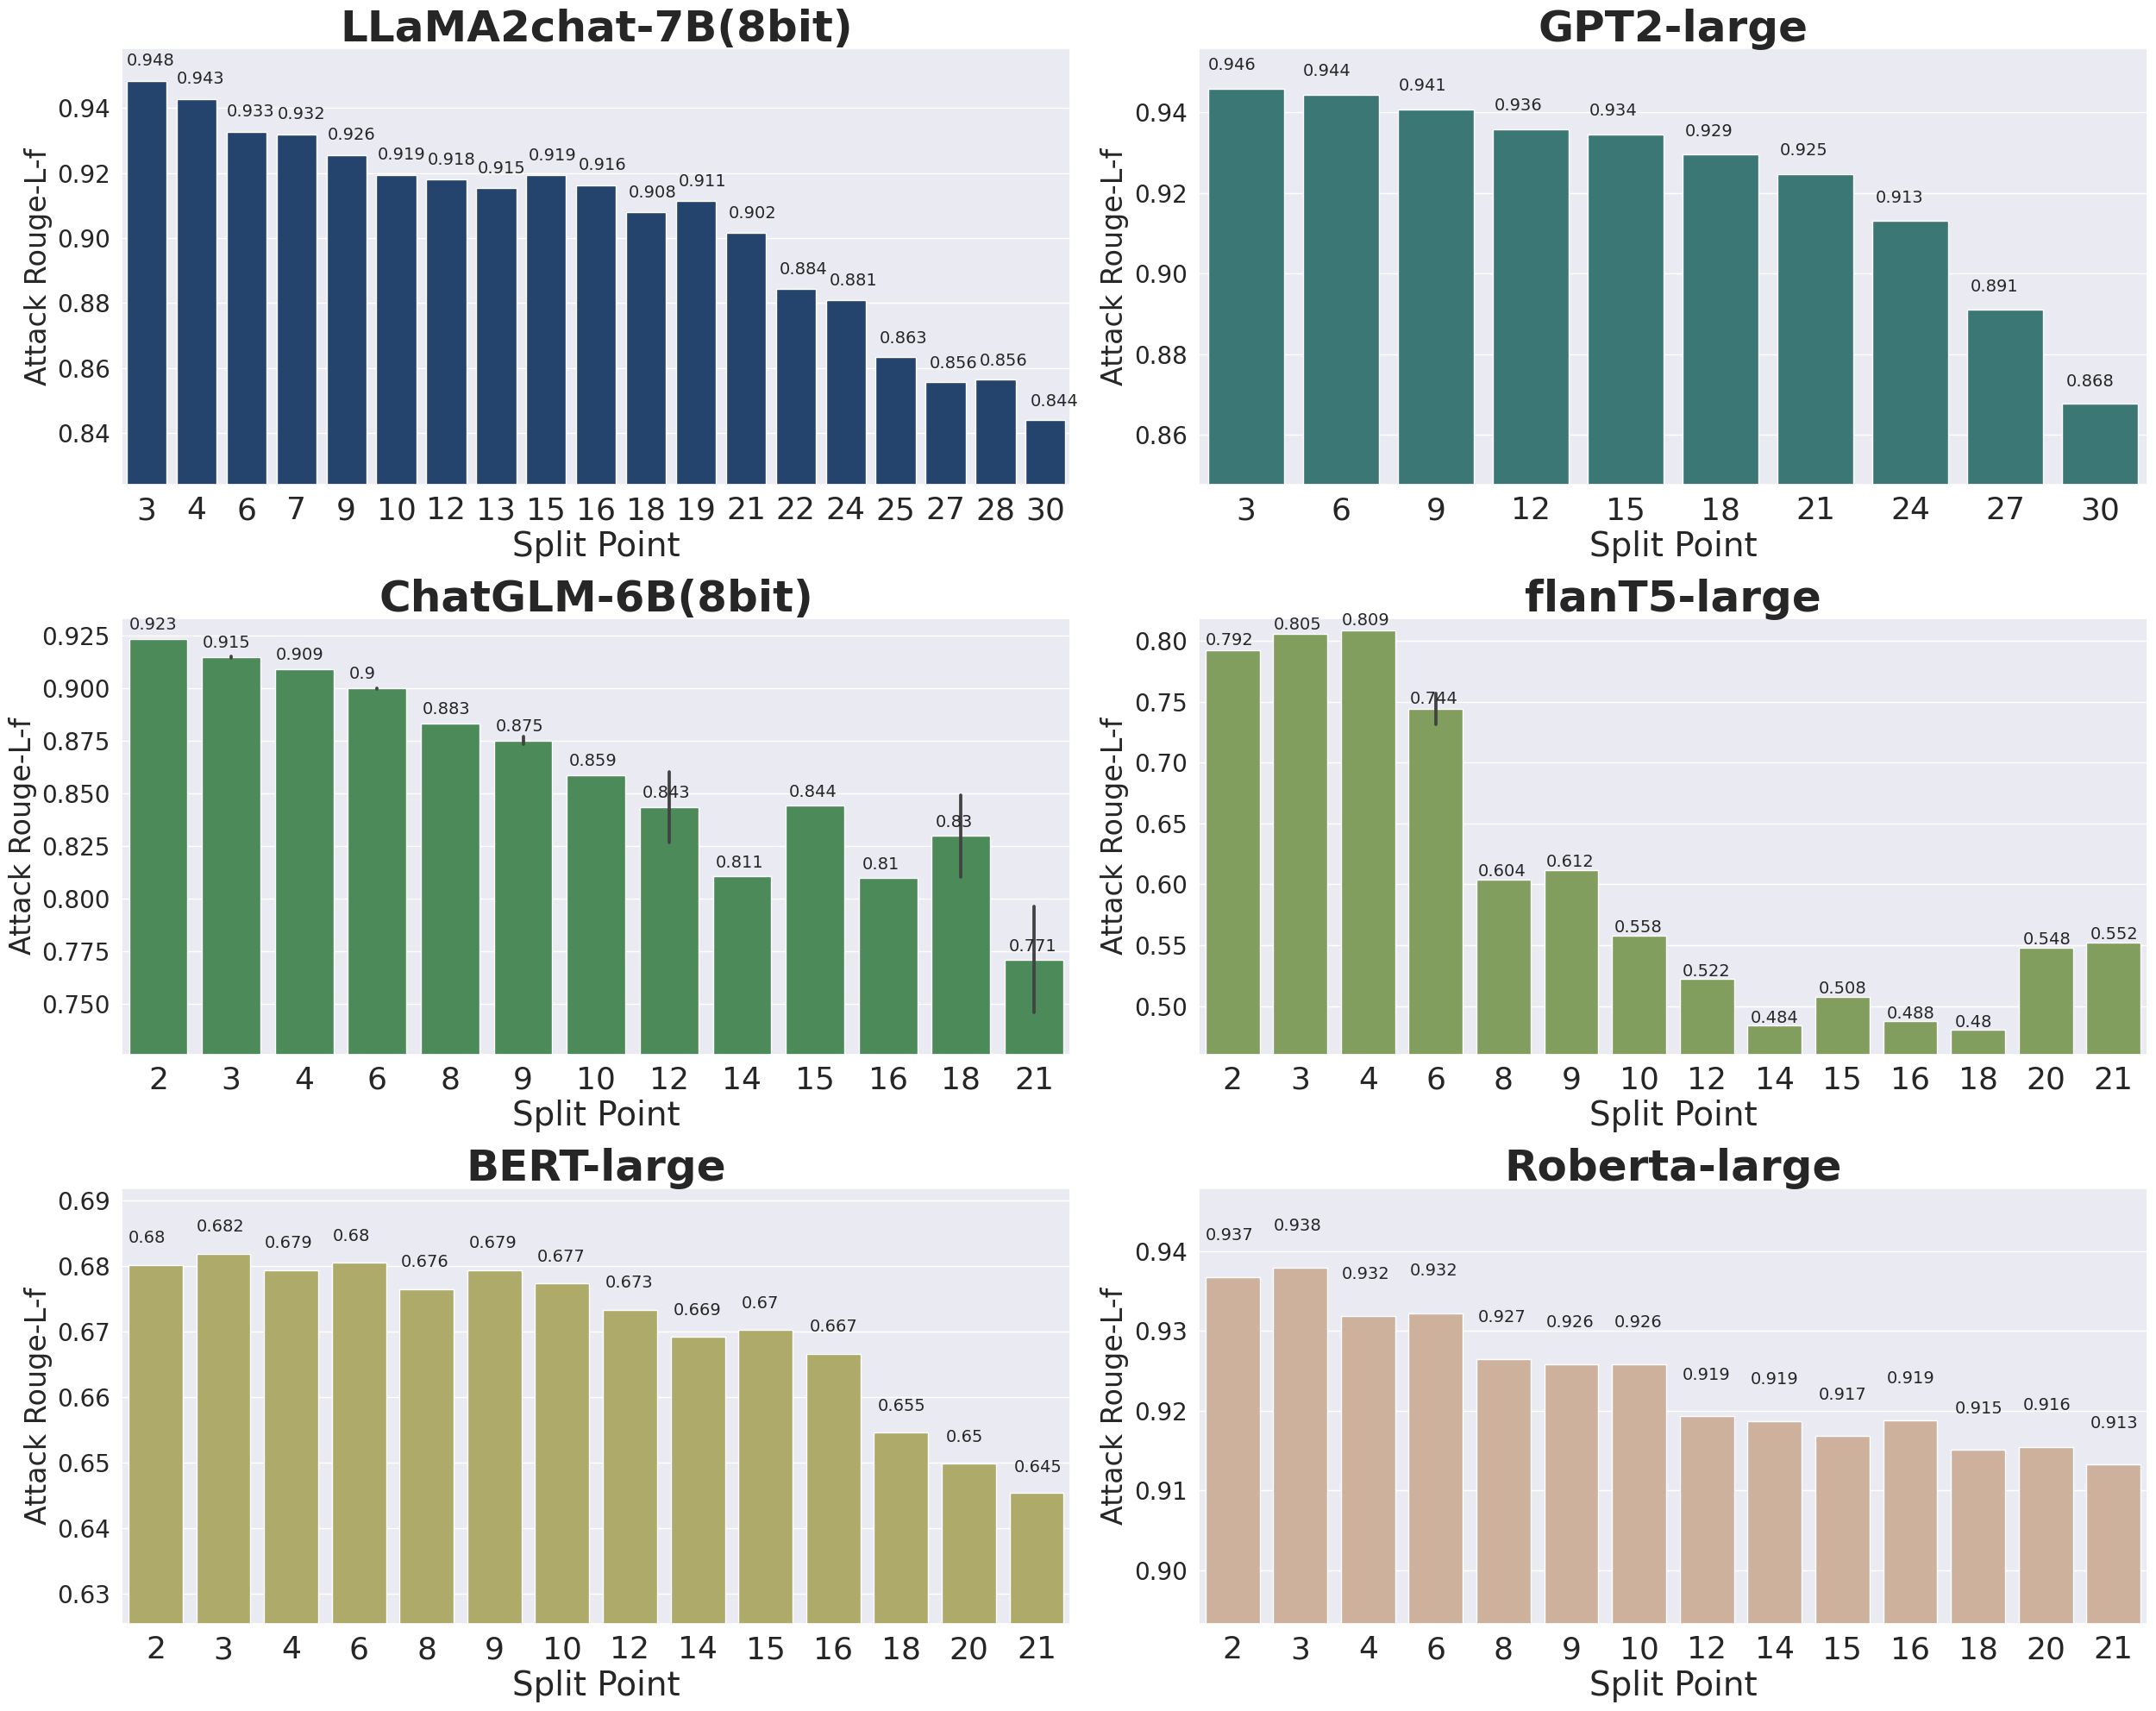

In [30]:
# model_names = csv['model_name'].unique()
model_names = ['llama2','gpt2-large', 'chatglm','flan-t5-large', 'bert-large', 'roberta-large']
model_show_names = ['LLaMA2chat-7B(8bit)','GPT2-large','ChatGLM-6B(8bit)', 'flanT5-large', 'BERT-large', 'Roberta-large']
# create a figure of subfigures 3*2
# use sns style
sns.set()
fig, axs = plt.subplots(3, 2, figsize=(25, 20))
# generate colors for each model_name, blue-based
colors = sns.color_palette("gist_earth", len(model_names))
# enlarge the margin between rows
plt.subplots_adjust(hspace=0.38, wspace=0.14)
for idx, (model_name,show_name) in enumerate(zip(model_names,model_show_names)):
    # make a figure for each model
    model_csv = csv[csv['model_name'] == model_name]
    # extract df['split_points'].split('-')[0] as x
    model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
    # use client0_DRA_b2tr_rgLf_avg as y
    model_csv = model_csv.sort_values(by='sp')
    # Bar plot on each subfigure
    sns.barplot(x='sp', y='client0_DRA_b2tr_rgLf_avg', data=model_csv, ax=axs[idx // 2, idx % 2], color=colors[idx])
    # set the min and max of y-axis as the min and max of the data + 0.1
    axs[idx // 2, idx % 2].set_ylim(model_csv['client0_DRA_b2tr_rgLf_avg'].min() - 0.02,
                                    model_csv['client0_DRA_b2tr_rgLf_avg'].max() + 0.01)
    # show the value of each bar
    for p in axs[idx // 2, idx % 2].patches:
        axs[idx // 2, idx % 2].annotate(str(round(p.get_height(), 3)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)

    # add title to the subfigure, bold
    axs[idx // 2, idx % 2].set_title(show_name, fontsize=36, fontweight='bold')
    # set the name of y-axis as DRA RougeL-f
    axs[idx // 2, idx % 2].set_ylabel('Attack Rouge-L-f', fontsize=24)
    # set the name of x-axis as split points
    axs[idx // 2, idx % 2].set_xlabel('Split Point', fontsize=28)
    axs[idx // 2, idx % 2].tick_params(axis='x', labelsize=26)
    axs[idx // 2, idx % 2].tick_params(axis='y', labelsize=20)

# eliminate the margin
plt.tight_layout()
# export the figure
plt.savefig('/root/autodl-tmp/sfl/exp_data/diff_sp.pdf', format='pdf')